# Abstract

The purpose behind disicion tree is to learn **what questions to ask in oreder to the best job at classifying or regeression**.  The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

# Theory

For example, Iris classification dataset uses as

In [1]:
import sklearn.datasets as datasets
import pandas as pd
iris = datasets.load_iris()
df  = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target

In [2]:
print("hhh")

hhh


In [3]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(df, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [4]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

C:\Users\Tamura Hideto\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x82 in position 18: invalid start byte

Look top graph. This graph represents graph tree made by decision tree process. The top of tree is called the **root node**. Intermediate **nodes** have arrows pointing to and away from them. Finally, the nodes at the bottom of tree without any edges pointing away from them is called **leaves**. Leaves tell us what class each sample belongs to.  

In order to determine how split the branches, introduce a concept called **impurity**. There are several ways to measure impurity (i.e. quality of split).  the scikit-learn implementation of the DecisionTreeClassifer uses **gini coefficient $I_G$** by default. Gini is formulated as 

$$
I_G(t)=1-\sum_{i=1}^{c}p(i|t)^2\\
where,  p(i|t)=\frac{n_i}{N}
$$

$c$ is number of explanatory variable class, $t$ is current node, $N$ is sampling number of training data, $n_i$ is number of training data belonging to class $i$. If the impurity (= $I_G$) is the lowest, $I_G$ is 0. If the impurity is the highest, $I_G$ is 1. i.e. the higher the impurity, the nearer 1.  
Next, calculate **information gain $\Delta{I_G(t)}$**. Gain is calculated as

$$
\Delta{I_G(t)}=I_G(t_B)-w_LI_G(t_L)-w_RI_G(t_R)
$$

$t_B$ is node before branches, $t_L$ and $t_R$ is each left node and right node after branched, $w_L$ and $w_R$ is weight of node after branched (ratio of amount of data to before branch). Then, do split from some view points. For example, $X_1\ge{3.1}$ or $X_2\le{2.45}$ or $X_3\ge{1.65}$ and so on. Finally, choose the condition which calculate the most largest gain. This process is done loop until reach the limit and this algorithm is called as **CART (Classification and Regression Tree)**.

# Hyperparameters

- criterion (default = "gini")  
 The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.  
 
 
- splitter (default = None)  
 The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.
 
 
- max_depth (default = None)  
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.


- min_sample_split (default = 2)  
The minimum number of samples required to split an internal node


- min_samples_leaf (default = 1)  
The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.


- min_weight_fraction_leaf (default = 0.)  
The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.


- max_features (default = None)  
The number of features to consider when looking for the best split


- max_leaf_nodes (default = None)  
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.


- min_impurity_decrease (default = 0.)  
A node will be split if this split induces a decrease of the impurity greater than or equal to this value.


- min_impurity_split (default = 1e-7)  
Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.


- class_weight (default = None)  
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

# Features

Some advantages of decision trees are:
- Simple to understand and to interpret. Trees can be visualised.  
- Requires little data preparation. Other techniques often require data normalisation, dummy variables need to be created and blank values to be removed. Note however that this module does not support missing values.
- The cost of using the tree (i.e., predicting data) is logarithmic in the number of data points used to train the tree.
- Able to handle both numerical and categorical data. Other techniques are usually specialised in analysing datasets that have only one type of variable. See algorithms for more information.
- Able to handle multi-output problems.
- Uses a white box model. If a given situation is observable in a model, the explanation for the condition is easily explained by boolean logic. By contrast, in a black box model (e.g., in an artificial neural network), results may be more difficult to interpret.
- Possible to validate a model using statistical tests. That makes it possible to account for the reliability of the model.
- Performs well even if its assumptions are somewhat violated by the true model from which the data were generated.

The disadvantages of decision trees include:
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning (not currently supported), setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.
- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.
- The problem of learning an optimal decision tree is known to be NP-complete under several aspects of optimality and even for simple concepts. Consequently, practical decision-tree learning algorithms are based on heuristic algorithms such as the greedy algorithm where locally optimal decisions are made at each node. Such algorithms cannot guarantee to return the globally optimal decision tree. This can be mitigated by training multiple trees in an ensemble learner, where the features and samples are randomly sampled with replacement.
- There are concepts that are hard to learn because decision trees do not express them easily, such as XOR, parity or multiplexer problems.
- Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.



# Imprementation

In [20]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [21]:
boston = datasets.load_boston()
x = boston.data
y = boston.target
x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.75)

In [22]:
model = DecisionTreeRegressor()
model.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

RMSE :  3.922196074553654


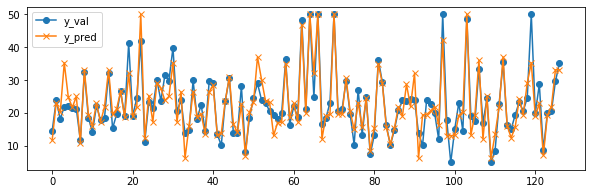

In [23]:
y_pred = model.predict(x_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print('RMSE : ', rmse)

fig, ax = plt.subplots(facecolor='w', figsize=(10,3))
ax.plot(y_val, marker = 'o', label='y_val')
ax.plot(y_pred, marker = 'x', label='y_pred')
ax.legend()
plt.show()

# References

https://towardsdatascience.com/decision-tree-in-python-b433ae57fb93  
https://scikit-learn.org/stable/modules/tree.html  
https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176  
https://qiita.com/3000manJPY/items/ef7495960f472ec14377